In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ca-dealers-used.csv
/kaggle/input/marketcheck-automotive-data-us-canada/ca-dealers-used.csv
us-dealers-used.csv
/kaggle/input/marketcheck-automotive-data-us-canada/us-dealers-used.csv
used_cars_data.csv
/kaggle/input/us-used-cars-dataset/used_cars_data.csv
vehicles.csv
/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
pd.set_option('display.max_columns', 500)

dfs = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'ca-dealers-used.csv':
            df = pd.read_csv(os.path.join(dirname, filename), nrows=1000)
            display(df.head(3))
            display(df.columns)
            dfs.append(df)

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,38b2f52e-8f5d,1GCWGFCF3F1284719,20998.0,115879.0,W1T503168C,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,nissan ellicott city,8569 Baltimore National Pike,Ellicott City,MD,21043
1,97ba4955-ccf0,WBY7Z8C59JVB87514,27921.0,7339.0,P33243,2018,BMW,i3,s,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,I,hendrick honda pompano beach,5381 N Federal Highway,Pompano Beach,FL,33064
2,be1da9fd-0f34,ML32F4FJ2JHF10325,11055.0,39798.0,WM2091A,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,FWD,Automatic,Unleaded,1.2,I,russ darrow toyota,2700 West Washington St.,West Bend,WI,53095


Index(['id', 'vin', 'price', 'miles', 'stock_no', 'year', 'make', 'model',
       'trim', 'body_type', 'vehicle_type', 'drivetrain', 'transmission',
       'fuel_type', 'engine_size', 'engine_block', 'seller_name', 'street',
       'city', 'state', 'zip'],
      dtype='object')

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016


Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [3]:
df1 = dfs[1]
df1 = df1[['vin', 'year', 'make_name', 'model_name', 'city', 'mileage', 'fuel_type', 'price']]
df1.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df2 = dfs[0]
df2 = df2[['vin', 'year', 'make', 'model', 'city', 'miles', 'fuel_type', 'price']]
df2.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df3 = dfs[2]
df3 = df3[['VIN', 'year', 'manufacturer', 'model', 'region', 'odometer', 'fuel', 'price']]
df3.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

frames=[df1,df2,df3]
df = pd.concat(frames)
display(df)

,vin,year,make,model,city,mileage,fuel,price
0,ZACNJABB5KPJ92081,2019.0,Jeep,Renegade,Bayamon,7.0,Gasoline,23141.0
1,SALCJ2FX1LH858117,2020.0,Land Rover,Discovery Sport,San Juan,8.0,Gasoline,46500.0
2,JF1VA2M67G9829723,2016.0,Subaru,WRX STI,Guaynabo,NaN,Gasoline,46995.0
3,SALRR2RV0L2433391,2020.0,Land Rover,Discovery,San Juan,11.0,Gasoline,67430.0
4,SALCJ2FXXLH862327,2020.0,Land Rover,Discovery Sport,San Juan,7.0,Gasoline,48880.0
...,...,...,...,...,...,...,...,...
995,4T1BG22K9YU991195,2000.0,toyota,camry,birmingham,164814.0,gas,3800.0
996,KM8K22AA7MU629352,2021.0,hyundai,kona,birmingham,1517.0,gas,0.0
997,NaN,2011.0,bmw,328i,birmingham,126000.0,gas,11500.0
998,JM3KFADM2K0531978,NaN,NaN,CX-5,birmingham,9193.0,gas,28990.0


In [4]:
cities = sorted(list(df.city.unique()))

In [5]:
df.price.value_counts()

0.0        60
5980.0     21
4999.0     20
26990.0    19
33990.0    19
           ..
20079.0     1
17925.0     1
19882.0     1
20090.0     1
11850.0     1
Name: price, Length: 1567, dtype: int64

(array([2.904e+03, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  999999.9, 1999999.8, 2999999.7, 3999999.6, 4999999.5,
        5999999.4, 6999999.3, 7999999.2, 8999999.1, 9999999. ]),
 <BarContainer object of 10 artists>)

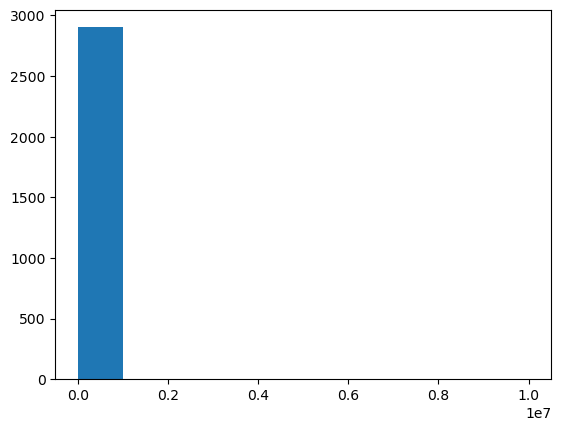

In [6]:
plt.hist(df.mileage)

In [7]:
df = df.dropna()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'mileage']], df['price'], test_size=0.2, random_state=42)

In [9]:
df.make.unique()

array(['Jeep', 'Land Rover', 'Mazda', 'Alfa Romeo', 'BMW', 'Hyundai',
       'Chevrolet', 'Lexus', 'Cadillac', 'Chrysler', 'Dodge',
       'Mercedes-Benz', 'Nissan', 'Honda', 'Kia', 'Ford', 'Lincoln',
       'Subaru', 'Audi', 'Volkswagen', 'Porsche', 'Jaguar', 'Toyota',
       'GMC', 'Acura', 'INFINITI', 'Maserati', 'RAM', 'FIAT', 'Volvo',
       'Mitsubishi', 'Buick', 'Mercury', 'Lamborghini', 'smart',
       'Ferrari', 'Pontiac', 'Scion', 'Aston Martin', 'Saab', 'Bentley',
       'Saturn', 'Oldsmobile', 'gmc', 'chevrolet', 'toyota', 'jeep',
       'ford', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'lexus',
       'jaguar', 'buick', 'volvo', 'audi', 'infiniti', 'lincoln',
       'alfa-romeo', 'acura', 'hyundai', 'bmw', 'chrysler', 'mitsubishi',
       'kia', 'porsche', 'dodge', 'mercedes-benz', 'subaru', 'ferrari',
       'mini', 'pontiac', 'volkswagen', 'fiat', 'rover'], dtype=object)

In [10]:
df['make'] = df['make'].apply(lambda x : x.lower().replace(' ', '_').replace('-', '_'))
df.make.unique()

array(['jeep', 'land_rover', 'mazda', 'alfa_romeo', 'bmw', 'hyundai',
       'chevrolet', 'lexus', 'cadillac', 'chrysler', 'dodge',
       'mercedes_benz', 'nissan', 'honda', 'kia', 'ford', 'lincoln',
       'subaru', 'audi', 'volkswagen', 'porsche', 'jaguar', 'toyota',
       'gmc', 'acura', 'infiniti', 'maserati', 'ram', 'fiat', 'volvo',
       'mitsubishi', 'buick', 'mercury', 'lamborghini', 'smart',
       'ferrari', 'pontiac', 'scion', 'aston_martin', 'saab', 'bentley',
       'saturn', 'oldsmobile', 'mini', 'rover'], dtype=object)

In [11]:
df.fuel.unique()

array(['Gasoline', 'Diesel', 'Biodiesel', 'Flex Fuel Vehicle', 'Electric',
       'Hybrid', 'E85 / Unleaded', 'Electric / Premium Unleaded',
       'Unleaded', 'Premium Unleaded', 'Premium Unleaded; Unleaded',
       'Electric / Unleaded', 'Unleaded; Unleaded / E85', 'gas', 'other',
       'diesel', 'hybrid'], dtype=object)

In [12]:
gasoline = {'gas', 
            'E85 / Unleaded',
       'Unleaded', 'Premium Unleaded',
       'Premium Unleaded; Unleaded', 
       'Unleaded; Unleaded / E85', 'Unleaded / E85',
       'E85 / Unleaded; Unleaded', 'Premium Unleaded / Unleaded',
       'E85 / Premium Unleaded; E85 / Unleaded', 
       'E85', 'E85 / Premium Unleaded', 
       'Compressed Natural Gas; Unleaded',
       'E85 / Unleaded; Unleaded / Unleaded',
       'Diesel / Premium Unleaded', 'E85 / Unleaded; Unleaded / E85',
       'Unleaded / Unleaded', 
       'Compressed Natural Gas / Unleaded', 'Diesel; Unleaded',
       'Diesel; E85 / Unleaded', 'E85 / Unleaded; Premium Unleaded',
       'Premium Unleaded; Premium Unleaded / E85', 'E85; E85 / Unleaded',
       'Unleaded / Premium Unleaded',
       'Premium Unleaded / E85',
       'M85 / Unleaded'
}

diesel = {
    'Biodiesel'
}

hybrid = {
       'Electric / Premium Unleaded', 
       'Electric / Unleaded',
       'Unleaded / Electric',
       'Electric / Hydrogen',
       'Electric / Premium Unleaded; Electric / Unleaded',
       'Electric / Premium Unleaded; Premium Unleaded',
       'Electric / E85'
}

other = {
    'Hydrogen', 
    'Premium Unleaded / Natural Gas',
    'Compressed Natural Gas / Lpg', 
    'Compressed Natural Gas', 'Propane',
    'Flex Fuel Vehicle',
}

In [13]:
def fuel_preprocess(x):
    if x in gasoline:
        return 'gasoline'
    if x in diesel:
        return 'diesel'
    if x in hybrid:
        return 'hybrid'
    if x in other:
        return 'other'
    return x

In [14]:
df['fuel'] = df['fuel'].apply(fuel_preprocess)
df['fuel'] = df['fuel'].apply(lambda x : x.lower())

In [15]:
df.fuel

0      gasoline
1      gasoline
3      gasoline
4      gasoline
5      gasoline
         ...   
993    gasoline
994    gasoline
995    gasoline
996    gasoline
999       other
Name: fuel, Length: 2345, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'mileage']], df['price'], test_size=0.2, random_state=42)

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_train, y_train)

0.02771855010660981

In [18]:
y_pred = pipe.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(max_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1242356586.422175
18627.083155650318
422800.0
-0.1345883771136065


In [19]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=35).fit(X_train, y_train)
dtr.score(X_test, y_test)

0.22281906811837082

In [20]:
y_pred = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(max_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

851001005.3348063
15782.328679513495
358454.7111111111
0.22281906811837082


Creating new datasets including 'make' and 'fuel'

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'make', 'fuel', 'mileage']], df['price'], test_size=0.2, random_state=42)

Applying One Hot Encoding to Make and Fuel

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# transformers
onehot = OneHotEncoder(handle_unknown='ignore')

onehot.fit( X_train[['fuel']] )

X_train.loc[:, onehot.categories_[0]] = onehot.transform(X_train[['fuel']]).todense()
X_test.loc[:, onehot.categories_[0]] = onehot.transform(X_test[['fuel']]).todense()

X_train.drop('fuel', axis='columns', inplace=True)
X_test.drop('fuel', axis='columns', inplace=True)

X_train

,year,make,mileage,diesel,electric,gasoline,hybrid,other
162,2020.0,volvo,18506.0,0.0,0.0,1.0,0.0,0.0
111,2018.0,gmc,20736.0,0.0,0.0,1.0,0.0,0.0
586,2017.0,lincoln,3505.0,0.0,0.0,1.0,0.0,0.0
315,2006.0,volkswagen,137562.0,0.0,0.0,1.0,0.0,0.0
974,2021.0,kia,6.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
840,2002.0,chevrolet,168914.0,0.0,0.0,1.0,0.0,0.0
175,2020.0,ram,6815.0,0.0,0.0,1.0,0.0,0.0
216,2009.0,porsche,97941.0,0.0,0.0,1.0,0.0,0.0
414,2013.0,mercedes_benz,111193.0,0.0,0.0,1.0,0.0,0.0


In [23]:
onehot.fit( X_train[['make']])

X_train.loc[:, onehot.categories_[0]] = onehot.transform(X_train[['make']]).todense()
X_test.loc[:, onehot.categories_[0]] = onehot.transform(X_test[['make']]).todense()

X_train.drop('make', axis='columns', inplace=True)
X_test.drop('make', axis='columns', inplace=True)

X_train

,year,mileage,diesel,electric,gasoline,hybrid,other,acura,alfa_romeo,aston_martin,audi,bentley,bmw,buick,cadillac,chevrolet,chrysler,dodge,ferrari,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lamborghini,land_rover,lexus,lincoln,maserati,mazda,mercedes_benz,mercury,mini,mitsubishi,nissan,oldsmobile,pontiac,porsche,ram,rover,saturn,scion,smart,subaru,toyota,volkswagen,volvo
162,2020.0,18506.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,2018.0,20736.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,2017.0,3505.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,2006.0,137562.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
974,2021.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,2002.0,168914.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,2020.0,6815.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,2009.0,97941.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2013.0,111193.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Standard scaling 'year' and 'mileage' features

In [24]:
scaler = StandardScaler()

X_train_num = X_train[['year', 'mileage']]
X_test_num = X_test[['year', 'mileage']]

scaler.fit(X_train_num)

X_train.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_num)
X_test.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_num)

X_train

,year,mileage,diesel,electric,gasoline,hybrid,other,acura,alfa_romeo,aston_martin,audi,bentley,bmw,buick,cadillac,chevrolet,chrysler,dodge,ferrari,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lamborghini,land_rover,lexus,lincoln,maserati,mazda,mercedes_benz,mercury,mini,mitsubishi,nissan,oldsmobile,pontiac,porsche,ram,rover,saturn,scion,smart,subaru,toyota,volkswagen,volvo
162,1.039310,-0.781552,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,0.665796,-0.744110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.479038,-1.033422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,-1.575291,1.217419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
974,1.226067,-1.092171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,-2.322321,1.743824,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,1.039310,-0.977846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,-1.015020,0.552175,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,-0.267991,0.774679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking Decision Tree Regressor performance

In [25]:
dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=35).fit(X_train, y_train)

dtr.score(X_test, y_test)

0.2728969160157426

Learning Curve for DTR

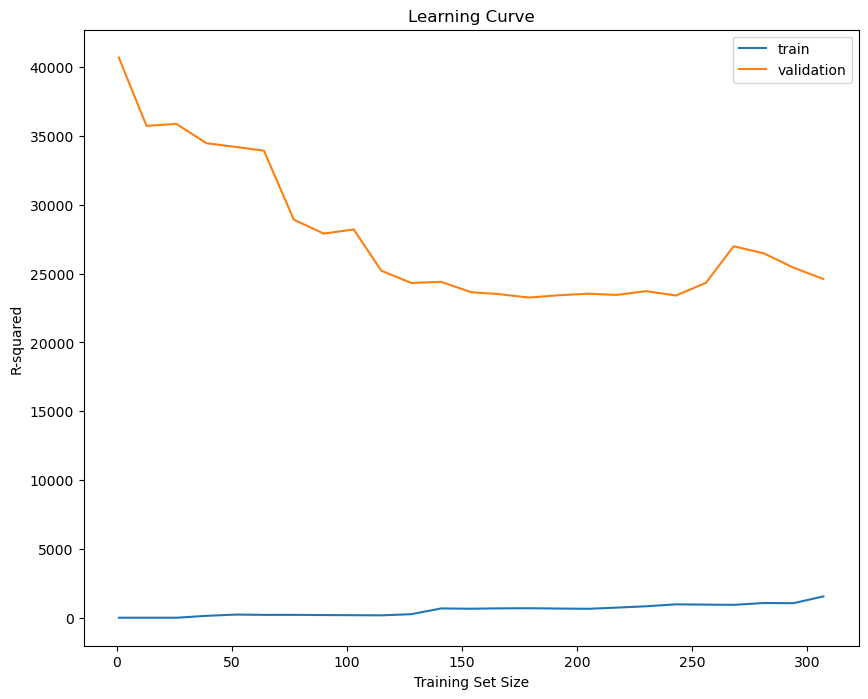

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = np.linspace(1, 307, 25,dtype=int),
    shuffle=True,
    random_state=42
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-squared")
plt.legend(loc="best")

plt.show()

Learning Curve for LinearSVR()

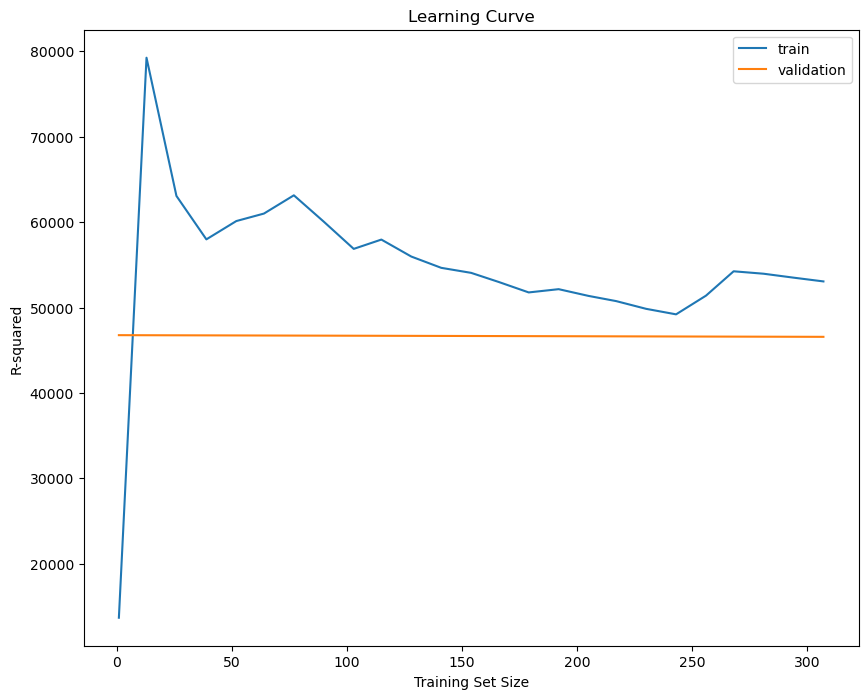

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR, LinearSVR
import matplotlib.pyplot as plt


# overfitting
pipe = make_pipeline(scaler, LinearSVR())

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = np.linspace(1, 307, 25,dtype=int),
    shuffle=True,
    random_state=42
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-squared")
plt.legend(loc="best")

plt.show()

Checking performance of SVR

In [28]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

-0.6808482218498271